In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load in Data from GitHub
data = pd.read_csv('final_data.csv')
data.head()

,title,audience_score,tomato_meter,rating,rating_contents,director,writer,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,wiki_page,plot,genre,language
0,the in-laws,83.0,88.0,NaN,NaN,arthur hiller,andrew bergman,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979,"peter falk, alan arkin",https://en.wikipedia.org/wiki/the_in-laws_(197...,the daughter of mild-mannered manhattan dentis...,comedy,english
1,race the sun,41.0,22.0,NaN,NaN,charles t. kanganis,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996,"halle berry, james belushi",https://en.wikipedia.org/wiki/race_the_sun,"a new science teacher, miss sandra beecher, (h...",drama,english
2,paul blart: mall cop,43.0,34.0,pg,"mild crude humor, language, some violence",steve carr,kevin james,183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009,"jayma mays, keir o'donnell, bobby cannavale, s...",https://en.wikipedia.org/wiki/paul_blart:_mall...,"paul blart lives in west orange, new jersey wi...",comedy,english
3,not without my daughter,71.0,53.0,NaN,NaN,brian gilbert,"betty mahmoody,william hoffer",43000000.0,metro-goldwyn-mayer,surround,NaN,13200000.0,9585.0,116,1991,"sally field, alfred molina, roshan seth",https://en.wikipedia.org/wiki/not_without_my_d...,"in 1984, an iranian physician, sayyed bozorg ""...",drama,english
4,rookie of the year,52.0,38.0,NaN,NaN,daniel stern,sam harper,56500000.0,20th century fox,NaN,NaN,10000000.0,21845.0,103,1993,"thomas ian nicholas, gary busey, dan hedaya",https://en.wikipedia.org/wiki/rookie_of_the_ye...,"henry rowengartner (nicholas), 12-year-old lit...","comedy, kids & family",english


In [2]:
data.columns

Index(['title', 'audience_score', 'tomato_meter', 'rating', 'rating_contents',
       'director', 'writer', 'box_office', 'distributor', 'sound_mix',
       'belongs_to_collection', 'budget', 'id', 'runtime', 'release_year',
       'cast', 'wiki_page', 'plot', 'genre', 'language'],
      dtype='object')

In [3]:
# Combine Director and Writer a single column with comma-separated values
data['Team'] = data.apply(lambda row: ', '.join(filter(None, [str(row['director']), str(row['writer'])])), axis=1)

In [4]:
data.drop(columns=['audience_score', 'tomato_meter','wiki_page', 'director', 'writer'], inplace=True)
data.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,plot,genre,language,Team
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979,"peter falk, alan arkin",the daughter of mild-mannered manhattan dentis...,comedy,english,"arthur hiller, andrew bergman"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996,"halle berry, james belushi","a new science teacher, miss sandra beecher, (h...",drama,english,"charles t. kanganis, nan"
2,paul blart: mall cop,pg,"mild crude humor, language, some violence",183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009,"jayma mays, keir o'donnell, bobby cannavale, s...","paul blart lives in west orange, new jersey wi...",comedy,english,"steve carr, kevin james"
3,not without my daughter,NaN,NaN,43000000.0,metro-goldwyn-mayer,surround,NaN,13200000.0,9585.0,116,1991,"sally field, alfred molina, roshan seth","in 1984, an iranian physician, sayyed bozorg ""...",drama,english,"brian gilbert, betty mahmoody,william hoffer"
4,rookie of the year,NaN,NaN,56500000.0,20th century fox,NaN,NaN,10000000.0,21845.0,103,1993,"thomas ian nicholas, gary busey, dan hedaya","henry rowengartner (nicholas), 12-year-old lit...","comedy, kids & family",english,"daniel stern, sam harper"


In [5]:
data['cast'] = (
    data['cast']
    .str.replace(";", ",", regex=False)
    .str.replace("and", ",", regex=False)
    .str.replace("with", ",", regex=False)
    .str.replace("voices of ", ",", regex=False)
    .str.replace("\r\n", ",", regex=False)
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove text within parentheses
    .str.replace("Cast:", "", regex=False)        # Remove "Cast:"
)

data['Team'] = (
    data['Team']
    .str.replace(";", ",", regex=False)
    .str.replace("and", ",", regex=False)
    .str.replace("with", ",", regex=False)
    .str.replace("voices of ", ",", regex=False)
    .str.replace("\r\n", ",", regex=False)
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove text within parentheses
    .str.replace("Director :", "", regex=False)  # Remove "Director :"
)
data.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,plot,genre,language,Team
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979,"peter falk, alan arkin",the daughter of mild-mannered manhattan dentis...,comedy,english,"arthur hiller, ,rew bergman"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996,"halle berry, james belushi","a new science teacher, miss sandra beecher, (h...",drama,english,"charles t. kanganis, nan"
2,paul blart: mall cop,pg,"mild crude humor, language, some violence",183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009,"jayma mays, keir o'donnell, bobby cannavale, s...","paul blart lives in west orange, new jersey wi...",comedy,english,"steve carr, kevin james"
3,not without my daughter,NaN,NaN,43000000.0,metro-goldwyn-mayer,surround,NaN,13200000.0,9585.0,116,1991,"sally field, alfred molina, roshan seth","in 1984, an iranian physician, sayyed bozorg ""...",drama,english,"brian gilbert, betty mahmoody,william hoffer"
4,rookie of the year,NaN,NaN,56500000.0,20th century fox,NaN,NaN,10000000.0,21845.0,103,1993,"thomas ian nicholas, gary busey, dan hedaya","henry rowengartner (nicholas), 12-year-old lit...","comedy, kids & family",english,"daniel stern, sam harper"


In [18]:
data['Team'] = data['Team'].fillna('').str.split(r',\s*')
data['cast'] = data['cast'].fillna('').str.split(r',\s*')
data.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,plot,genre,language,Team
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979-01-01,"[peter falk, alan arkin]",the daughter of mild-mannered manhattan dentis...,comedy,english,"[arthur hiller, , rew bergman]"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996-01-01,"[halle berry, james belushi]","a new science teacher, miss sandra beecher, (h...",drama,english,"[charles t. kanganis, nan]"
2,paul blart: mall cop,pg,"mild crude humor, language, some violence",183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009-01-01,"[jayma mays, keir o'donnell, bobby cannavale, ...","paul blart lives in west orange, new jersey wi...",comedy,english,"[steve carr, kevin james]"
3,not without my daughter,NaN,NaN,43000000.0,metro-goldwyn-mayer,surround,NaN,13200000.0,9585.0,116,1991-01-01,"[sally field, alfred molina, roshan seth]","in 1984, an iranian physician, sayyed bozorg ""...",drama,english,"[brian gilbert, betty mahmoody, william hoffer]"
4,rookie of the year,NaN,NaN,56500000.0,20th century fox,NaN,NaN,10000000.0,21845.0,103,1993-01-01,"[thomas ian nicholas, gary busey, dan hedaya]","henry rowengartner (nicholas), 12-year-old lit...","comedy, kids & family",english,"[daniel stern, sam harper]"


## Try Latent Factor Extraction

In [ ]:
# Import MultiLabelBinarizer
#from sklearn.preprocessing import MultiLabelBinarizer

# Create a one-hot encoded matrix from the list of names
#mlb = MultiLabelBinarizer()

#name_matrix = mlb.fit_transform(data2['names'])

#name_df = pd.DataFrame(name_matrix, columns=mlb.classes_)

#actor_counts = name_df.sum(axis=0)

# Filter out actors that appear only once (i.e., count == 1)
#filtered_name_df = name_df.loc[:, actor_counts > 10]

#print("One-hot encoded matrix:")
#print(name_df)


In [6]:
#fmatrix = filtered_name_df.values

# Alternatively, using .to_numpy()
#fmatrix = filtered_name_df.to_numpy()

In [ ]:
#import matplotlib.pyplot as plt
#from sklearn.decomposition import TruncatedSVD

# Use a higher number of components to inspect explained variance
#n_components_initial = 2500
#svd = TruncatedSVD(n_components=n_components_initial, random_state=42)

#svd.fit_transform(name_matrix)

#explained_variance = svd.explained_variance_ratio_
#cumulative_variance = explained_variance.cumsum()

# Plot the cumulative explained variance (Scree Plot)
#plt.figure(figsize=(8, 4))
#plt.plot(range(1, n_components_initial + 1), cumulative_variance, marker='o')
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.title('Scree Plot for TSVD Components')
#plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
#plt.legend()
#plt.show()


In [81]:
#movies = name_df.apply(lambda row: list(name_df.columns[row == 1]), axis=1).tolist()

#exclusion_tokens = {" ", "Jr.", "on", "er", "ler", '', 'Am', 'S', 'eras', 'a peet'
#}

# 
#   cleaned_movies = [
#    [actor for actor in movie if actor not in exclusion_tokens]
#    for movie in movies
#]


In [ ]:
#from gensim import corpora, models

# Create a dictionary mapping actor names to IDs
#dictionary = corpora.Dictionary(cleaned_movies)

# Convert each movie into a bag-of-actors representation
#corpus = [dictionary.doc2bow(movie) for movie in movies]

In [ ]:
#num_topics = 10 
#lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, random_state=42)

In [ ]:
#import pyLDAvis
#import pyLDAvis.gensim_models as gensimvis

# Enable notebook display for pyLDAvis
#pyLDAvis.enable_notebook()

# Prepare the visualization data
#vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization inline in your notebook
#vis_data


In [ ]:
#import pandas as pd
#import numpy as np
#from scipy.sparse import csr_matrix
#from sklearn.decomposition import TruncatedSVD
#import matplotlib.pyplot as plt

# Assume name_df is already defined and is a DataFrame with shape (2958, 4823)
# For example, you might have:
# name_df = pd.read_csv('your_file.csv')

# Convert the DataFrame to a SciPy sparse matrix (CSR format)
#sparse_matrix = csr_matrix(name_df.values)

# Define a range of SVD components to test (e.g., from 10 to 200 in steps of 10)
#component_range = range(100, 1000, 100)
#cumulative_explained = []

# Iterate over the range of components and compute cumulative explained variance
#for n_components in component_range:
#    svd = TruncatedSVD(n_components=n_components, random_state=42)
#    svd.fit(sparse_matrix)
#    explained = np.sum(svd.explained_variance_ratio_)
#    cumulative_explained.append(explained)
#   print(f"n_components: {n_components}, Cumulative Explained Variance: {explained:.4f}")

# Plot cumulative explained variance vs. number of components
#plt.figure(figsize=(8, 4))
#plt.plot(list(component_range), cumulative_explained, marker='o')
#plt.xlabel('Number of Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.title('Optimal Number of SVD Components')
#plt.grid(True)
#plt.show()

In [ ]:
#import pandas as pd
#from scipy.sparse import csr_matrix
#from sklearn.decomposition import TruncatedSVD
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import normalize
#from sklearn.metrics import silhouette_score
#import matplotlib.pyplot as plt

#svd = TruncatedSVD(n_components=400, random_state=42)
#movie_features = svd.fit_transform(sparse_matrix)

# Normalize the feature vectors
#movie_features = normalize(movie_features)

# Define a range of cluster numbers to try
#cluster_range = range(2, 25)  # trying cluster counts from 2 to 15
#silhouette_scores = []

#for n_clusters in cluster_range:
#    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#    cluster_labels = kmeans.fit_predict(movie_features)
#    score = silhouette_score(movie_features, cluster_labels)
#    silhouette_scores.append(score)
#    print(f"Number of clusters: {n_clusters} - Silhouette Score: {score:.4f}")

# Plot silhouette scores to visually inspect the optimal cluster count
#plt.figure(figsize=(8, 4))
#plt.plot(list(cluster_range), silhouette_scores, marker='o')
#plt.title("Silhouette Score vs. Number of Clusters")
#plt.xlabel("Number of Clusters")
#plt.ylabel("Silhouette Score")
#plt.xticks(list(cluster_range))
#plt.grid(True)
#plt.show()

In [ ]:
#sparse_matrix = csr_matrix(name_df.values)

# Define a range of SVD components to test
#component_options = [50, 100, 200, 400,500,600, 700, 800, 900]
#sil_scores = {}

#for n_components in component_options:
#    svd = TruncatedSVD(n_components=n_components, random_state=42)
#    features = svd.fit_transform(sparse_matrix)
#    features = normalize(features)
    
    # Use a fixed number of clusters; you can adjust based on your earlier analysis
#    kmeans = KMeans(n_clusters=10, random_state=42)
    labels = kmeans.fit_predict(features)
    
 #   score = silhouette_score(features, labels)
 #   sil_scores[n_components] = score
 #   print(f"n_components: {n_components} - Silhouette Score: {score:.4f}")

# Plot the silhouette scores against the number of components
#plt.figure(figsize=(8, 4))
#plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
#plt.xlabel('Number of SVD Components')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Score vs. SVD Components')
#plt.grid(True)
#plt.show()

## Reviews Mapped to Team Members (Cast, Director, Writer) 

In [ ]:
# Load in Review
reviews = pd.read_csv('Rotten/rotten_tomatoes_movie_reviews.csv')
reviews.head()

In [ ]:
# Load in Movies
movies = pd.read_csv('Rotten/rotten_tomatoes_movies.csv')
movies.head()

In [ ]:
# Merge movies and reviews by 'id'
merged_df = pd.merge(movies, reviews, on='id', how='inner')
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
# Get unique names from the TEAM OR CAST column
#unique_names = pd.Series([name for sublist in data['cast'].apply(lambda x: list(set(x))).tolist() for name in sublist]).unique()
#unique_names = unique_names[unique_names != '']

unique_names = pd.Series([name for sublist in data['Team'].apply(lambda x: list(set(x))).tolist() for name in sublist]).unique()
unique_names = unique_names[unique_names != '']

unique_names.shape

In [ ]:
# Drop duplicates and clean names
unique_names = pd.Series(unique_names).drop_duplicates().str.strip()
sorted_unique_names = sorted([name for name in unique_names if name and len(name.split()) >= 2 and len(name) > 3])
len(sorted_unique_names)

In [ ]:
sorted_unique_names2 = [name for name in sorted_unique_names if len(name.split()[0]) != 1 and len(name.split()[-1]) > 1]
len(sorted_unique_names2)

In [ ]:
final_names = [name for name in sorted_unique_names2 if len(name.split()) < 4]
len(final_names)

In [ ]:
### DONT RUN THIS CELL

# Create a list to store the reviews for each actor
reviews = []

# Compile regex pattern once for efficiency
name_patterns = {name: re.compile(r'\b' + re.escape(name) + r'\b', re.IGNORECASE) for name in final_names}

# Iterate through each review in merged_df
for index, row in merged_df.iterrows():
    print(f"Processing row {index} ({(index / 1469543) * 100:.2f}%)")
    review_text = row['reviewText']
    if pd.isna(review_text):
        continue
    seen_review_ids = set()
    # Check each name pattern against the review text
    for name, pattern in name_patterns.items():
        if pattern.search(review_text) and row['reviewId'] not in seen_review_ids:
            reviews.append({
                'Name': name, 
                'Review': review_text, 
                'reviewId': row['reviewId'], 
                'creationDate': row['creationDate'],
                'audienceScore': row['audienceScore'],
                'tomatoMeter': row['tomatoMeter']
            })
            seen_review_ids.add(row['reviewId'])

# Convert the list to a DataFrame
#actor_reviews_df = pd.DataFrame(reviews)
team_reviews_df = pd.DataFrame(reviews)
#actor_reviews_df.head()
team_reviews_df.head()

In [ ]:
#actor_reviews_df.sort_values('Name')
team_reviews_df.sort_values('Name')

In [ ]:
#actor_reviews_df['Name'].nunique()
team_reviews_df['Name'].nunique()

In [128]:
# Save the DataFrame to a CSV file
#actor_reviews_df.to_csv('actor_reviews.csv', index=False)
team_reviews_df.to_csv('team_reviews.csv', index=False)

In [17]:
# Save the DataFrame to a JSON file
#import json

#with open('actor_reviews.json', 'w') as f:
#    json.dump(actor_reviews, f, indent=4)

In [6]:
# load in Reviews - ran prior in above cells
dat = pd.read_csv('actor_reviews.csv')
#team = pd.read_csv('team_reviews.csv')

In [7]:
dat1 = dat.drop_duplicates()
#team1 = team.drop_duplicates()

In [8]:
del dat
#del team

In [ ]:
# Combine dat1 and team1
#combined_dat = pd.concat([dat1, team1], ignore_index=True)

In [ ]:
#combined_dat = combined_dat.drop_duplicates()

In [9]:
### Calculate Sentiment Scores for each Actor Review
analyzer = SentimentIntensityAnalyzer()

dat1['Sentiment'] = dat1['Review'].apply(lambda review: analyzer.polarity_scores(review))
#team1['Sentiment'] = team1['Review'].apply(lambda review: analyzer.polarity_scores(review))

In [10]:
# Extract Main Score 
dat1['compound'] = dat1['Sentiment'].apply(lambda sentiment: sentiment['compound'])
dat1 = dat1.sort_values('Name').reset_index(drop=True)

#team1['compound'] = team1['Sentiment'].apply(lambda sentiment: sentiment['compound'])
#team1 = team1.sort_values('Name').reset_index(drop=True)

In [11]:
dat1['creationDate'] = pd.to_datetime(dat1['creationDate'])

In [12]:
data.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,plot,genre,language,Team
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979,"peter falk, alan arkin",the daughter of mild-mannered manhattan dentis...,comedy,english,"arthur hiller, ,rew bergman"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996,"halle berry, james belushi","a new science teacher, miss sandra beecher, (h...",drama,english,"charles t. kanganis, nan"
2,paul blart: mall cop,pg,"mild crude humor, language, some violence",183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009,"jayma mays, keir o'donnell, bobby cannavale, s...","paul blart lives in west orange, new jersey wi...",comedy,english,"steve carr, kevin james"
3,not without my daughter,NaN,NaN,43000000.0,metro-goldwyn-mayer,surround,NaN,13200000.0,9585.0,116,1991,"sally field, alfred molina, roshan seth","in 1984, an iranian physician, sayyed bozorg ""...",drama,english,"brian gilbert, betty mahmoody,william hoffer"
4,rookie of the year,NaN,NaN,56500000.0,20th century fox,NaN,NaN,10000000.0,21845.0,103,1993,"thomas ian nicholas, gary busey, dan hedaya","henry rowengartner (nicholas), 12-year-old lit...","comedy, kids & family",english,"daniel stern, sam harper"


In [13]:
data['release_year'] = pd.to_datetime(data['release_year'].astype(str) + '-01-01')

In [19]:
## Expand Data by Cast Members
movie_exploded = data.explode(['cast'])
#movie_exploded = movie_exploded.explode('Team')

In [20]:
movie_exploded.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,release_year,cast,plot,genre,language,Team
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979-01-01,peter falk,the daughter of mild-mannered manhattan dentis...,comedy,english,"[arthur hiller, , rew bergman]"
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,1979-01-01,alan arkin,the daughter of mild-mannered manhattan dentis...,comedy,english,"[arthur hiller, , rew bergman]"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996-01-01,halle berry,"a new science teacher, miss sandra beecher, (h...",drama,english,"[charles t. kanganis, nan]"
1,race the sun,NaN,NaN,1700000.0,NaN,surround,NaN,0.0,55731.0,100,1996-01-01,james belushi,"a new science teacher, miss sandra beecher, (h...",drama,english,"[charles t. kanganis, nan]"
2,paul blart: mall cop,pg,"mild crude humor, language, some violence",183000000.0,"sony pictures releasing,",NaN,NaN,26000000.0,NaN,91,2009-01-01,jayma mays,"paul blart lives in west orange, new jersey wi...",comedy,english,"[steve carr, kevin james]"


In [21]:
# Check Title Volume
movie_exploded['title'].nunique()

5298

In [22]:
movie_exploded.shape

(24026, 16)

In [19]:
del data

In [23]:
# Merge with Final Data
total = movie_exploded.merge(dat1,left_on='cast', right_on='Name', how='left')

In [24]:
total.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,...,language,Team,Name,Review,reviewId,creationDate,audienceScore,tomatoMeter,Sentiment,compound
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Good-natured but only memorable as a platform ...,1434746.0,2005-09-13,51.0,45.0,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.2960
1,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,"Walter Hill continues doing what he does best,...",759469.0,2002-08-24,46.0,48.0,"{'neg': 0.125, 'neu': 0.717, 'pos': 0.158, 'co...",0.2263
2,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,A low-key comedy that features a wonderful per...,102781012.0,2023-02-17,0.0,NaN,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7351
3,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,How brilliant is Wings of Desire? Understand t...,1993631.0,2011-06-25,93.0,98.0,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.8442
4,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Will somebody please offer Peter Falk a decent...,800485.0,2002-10-21,39.0,7.0,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.3182


In [25]:
del movie_exploded
del dat1

In [26]:
total.rename(columns={
    'audienceScore': 'Cast_audienceScore',
    'tomatoMeter': 'Cast_tomatoMeter',
    'Sentiment': 'Cast_Sentiment',
    'compound': 'Cast_compound',
    'Review': 'Cast_Review',
    'reviewId': 'Cast_reviewId',
    'creationDate': 'Cast_creationDate'
}, inplace=True)
total.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,...,language,Team,Name,Cast_Review,Cast_reviewId,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Sentiment,Cast_compound
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Good-natured but only memorable as a platform ...,1434746.0,2005-09-13,51.0,45.0,"{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.2960
1,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,"Walter Hill continues doing what he does best,...",759469.0,2002-08-24,46.0,48.0,"{'neg': 0.125, 'neu': 0.717, 'pos': 0.158, 'co...",0.2263
2,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,A low-key comedy that features a wonderful per...,102781012.0,2023-02-17,0.0,NaN,"{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'comp...",0.7351
3,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,How brilliant is Wings of Desire? Understand t...,1993631.0,2011-06-25,93.0,98.0,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp...",0.8442
4,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Will somebody please offer Peter Falk a decent...,800485.0,2002-10-21,39.0,7.0,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.3182


In [27]:
# Check Title Overlap
total['title'].nunique()

5298

In [28]:
total.shape

(914811, 24)

In [29]:
# Drop duplicates in the 'total' DataFrame
total.drop(columns=['Cast_Sentiment'], inplace=True)

In [30]:
# Drop duplicates in the 'total' DataFrame
total.drop_duplicates(inplace=True)

TypeError: unhashable type: 'list'

In [31]:
total.shape

(914811, 23)

In [32]:
# Create Key for Aggregation
total['movie_id'] = total['title'] + '_' + total['release_year'].dt.year.astype(str)
total.head()

,title,rating,rating_contents,box_office,distributor,sound_mix,belongs_to_collection,budget,id,runtime,...,language,Team,Name,Cast_Review,Cast_reviewId,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_compound,movie_id
0,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Good-natured but only memorable as a platform ...,1434746.0,2005-09-13,51.0,45.0,0.2960,the in-laws_1979
1,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,"Walter Hill continues doing what he does best,...",759469.0,2002-08-24,46.0,48.0,0.2263,the in-laws_1979
2,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,A low-key comedy that features a wonderful per...,102781012.0,2023-02-17,0.0,NaN,0.7351,the in-laws_1979
3,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,How brilliant is Wings of Desire? Understand t...,1993631.0,2011-06-25,93.0,98.0,0.8442,the in-laws_1979
4,the in-laws,NaN,NaN,38200000.0,NaN,NaN,NaN,9000000.0,NaN,103,...,english,"[arthur hiller, , rew bergman]",peter falk,Will somebody please offer Peter Falk a decent...,800485.0,2002-10-21,39.0,7.0,0.3182,the in-laws_1979


In [33]:
# Group by 'movie_id', aggregate metrics and keep all other columns. Make sure to filter for point in time data
aggregated_data = total.groupby('movie_id').apply(lambda group: pd.Series({
    #'Team_Review_Score_sum': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_compound'].sum() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    #'Team_Review_Score_mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_compound'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    #'Team_Audience_Score_Mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_audienceScore'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    #'Team_Tomato_Meter_Mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_tomatoMeter'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    #'Team_Num_reviews': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_reviewId'].nunique() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    'Cast_Review_Score_sum': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_compound'].sum() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    'Cast_Review_Score_mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_compound'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    'Cast_Audience_Score_Mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_audienceScore'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    'Cast_Tomato_Meter_Mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_tomatoMeter'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    'Cast_Num_reviews': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_reviewId'].nunique() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    **{col: group[col].iloc[0] for col in total.columns if col not in ['movie_id', 'Cast_compound', 'Cast_Review', 'Cast_reviewId']}
})).reset_index()

aggregated_data.head()

/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/2868642647.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = total.groupby('movie_id').apply(lambda group: pd.Series({


,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,release_year,cast,plot,genre,language,Team,Name,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter
0,$9.99 _2008,3.2698,0.163490,66.900,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,2008-01-01,geoffrey rush,the film mainly focuses on 28-year-old dave pe...,"fantasy, animation, drama",english,"[tatia rosenthal, etgar keret]",geoffrey rush,2017-08-23,49.0,73.0
1,'til there was you_1997,0.0000,0.000000,0.000,0.000000,0,'til there was you,NaN,NaN,3500000.0,...,1997-01-01,jeanne tripplehorn,gwen moss (jeanne tripplehorn) has spent the b...,"romance, rom com",english,"[scott winant, winnie holzman]",jeanne tripplehorn,2018-02-02,23.0,57.0
2,...all the marbles_1981,0.0000,0.000000,0.000,0.000000,0,...all the marbles,NaN,NaN,6500000.0,...,1981-01-01,peter falk,harry is the manager of a tag team of gorgeous...,"drama, comedy",english,"[robert aldrich, rich eustismel frohman]",peter falk,2005-09-13,51.0,45.0
3,...and justice for all_1979,0.0000,0.000000,0.000,0.000000,0,...and justice for all,NaN,NaN,33300000.0,...,1979-01-01,al pacino,"arthur kirkland, a defense attorney in baltimo...","drama, comedy",english,"[norman jewison, valerie curtin]",al pacino,2017-09-02,82.0,91.0
4,10 cloverfield lane_2016,14.4153,0.360382,57.375,64.825000,40,10 cloverfield lane,pg-13,"frightening sequences, brief language, some vi...",110200000.0,...,2016-01-01,mary elizabeth winstead,"after breaking up with her boyfriend ben, mich...","mystery & thriller, science fiction psychologi...",english,"[dan trachtenberg, josh campbell, matthew stue...",mary elizabeth winstead,2018-10-10,71.0,86.0


In [34]:
aggregated_data.shape

(5362, 26)

In [ ]:
aggregated_data.columns

In [35]:
aggregated_data['movie_id'].nunique()

5362

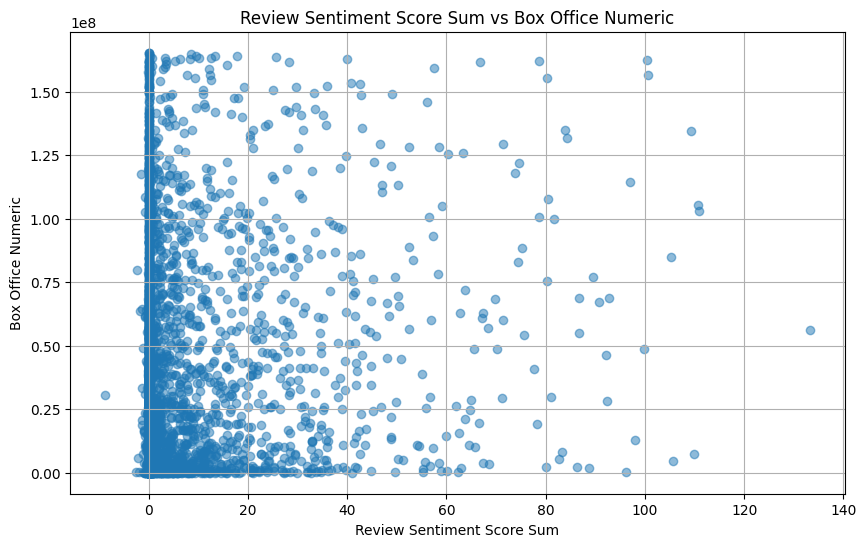

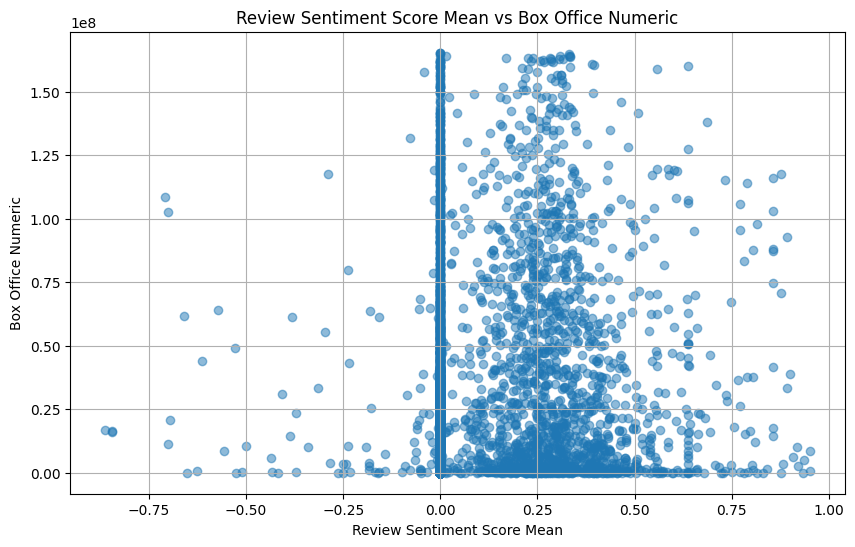

In [40]:

# Sentiment Score Sum vs Box Office Revenue
# Filter out box office outliers
Q1 = aggregated_data['box_office'].quantile(0.25)
Q3 = aggregated_data['box_office'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = aggregated_data[(aggregated_data['box_office'] >= (Q1 - 1.5 * IQR)) & (aggregated_data['box_office'] <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Cast_Review_Score_sum'], filtered_data['box_office'], alpha=0.5)
plt.title('Review Sentiment Score Sum vs Box Office Numeric')
plt.xlabel('Review Sentiment Score Sum')
plt.ylabel('Box Office Numeric')
plt.grid(True)
plt.show()

# Sentiment Score Mean vs Box Office Revenue
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Cast_Review_Score_mean'], filtered_data['box_office'], alpha=0.5)
plt.title('Review Sentiment Score Mean vs Box Office Numeric')
plt.xlabel('Review Sentiment Score Mean')
plt.ylabel('Box Office Numeric')
plt.grid(True)
plt.show()

In [41]:
aggregated_data['Cast_Review_Score_sum'].describe()

count    5362.000000
mean        6.339973
std        15.556482
min        -8.739900
25%         0.000000
50%         0.000000
75%         4.014275
max       173.336700
Name: Cast_Review_Score_sum, dtype: float64

In [42]:
aggregated_data['Cast_Review_Score_mean'].describe()

count    5362.000000
mean        0.114399
std         0.188442
min        -0.862500
25%         0.000000
50%         0.000000
75%         0.244092
max         0.950900
Name: Cast_Review_Score_mean, dtype: float64

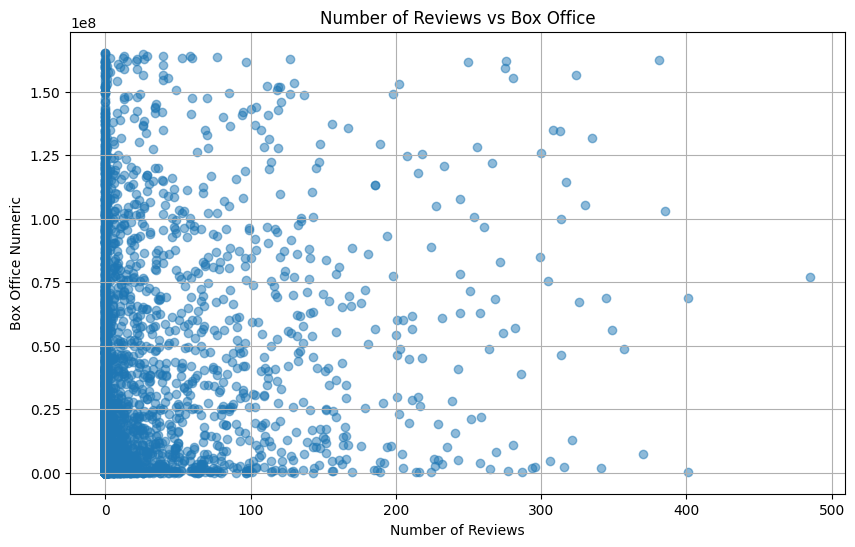

In [44]:
# Number of Reviews vs Box Office
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Cast_Num_reviews'], filtered_data['box_office'], alpha=0.5)
plt.title('Number of Reviews vs Box Office')
plt.xlabel('Number of Reviews')
plt.ylabel('Box Office Numeric')
plt.grid(True)
plt.show()

In [45]:
aggregated_data['Cast_Num_reviews'].describe()

count    5362.000000
mean       23.823760
std        56.600984
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max       576.000000
Name: Cast_Num_reviews, dtype: float64

In [46]:
# Separate aggregated_data number of reviews into quantiles
aggregated_data['num_reviews_quantiles'] = pd.qcut(aggregated_data['Cast_Num_reviews'], q=5, labels=False)

# Check Interaction with Box Office
plt.figure(figsize=(10, 6))
aggregated_data.boxplot(column='box_office', by='num_reviews_quantiles')
plt.title('Box Office Numeric by Number of Reviews Quantiles')
plt.suptitle('')
plt.xlabel('Number of Reviews Quantiles')
plt.ylabel('Box Office Revenue')
plt.grid(True)
plt.show()

# Separate aggregated_data compound mean into quantiles
aggregated_data['compound_mean_quantiles'] = pd.qcut(aggregated_data['Review_Score_mean'], q=5, labels=False)

plt.figure(figsize=(10, 6))
aggregated_data.boxplot(column='box_office', by='compound_mean_quantiles')
plt.title('Box Office Numeric by Compound Mean Quantiles')
plt.suptitle('')
plt.xlabel('Compound Mean Quantiles')
plt.ylabel('Box Office Revenue')
plt.grid(True)
plt.show()


ValueError: Bin edges must be unique: Index([0.0, 0.0, 0.0, 1.0, 28.0, 576.0], dtype='float64', name='Cast_Num_reviews').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [47]:
### Movies that Lost Money
aggregated_data[aggregated_data['budget'] > aggregated_data['box_office']]

,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,release_year,cast,plot,genre,language,Team,Name,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter
1,'til there was you_1997,0.0000,0.000000,0.000000,0.000000,0,'til there was you,NaN,NaN,3500000.0,...,1997-01-01,jeanne tripplehorn,gwen moss (jeanne tripplehorn) has spent the b...,"romance, rom com",english,"[scott winant, winnie holzman]",jeanne tripplehorn,2018-02-02,23.0,57.0
2,...all the marbles_1981,0.0000,0.000000,0.000000,0.000000,0,...all the marbles,NaN,NaN,6500000.0,...,1981-01-01,peter falk,harry is the manager of a tag team of gorgeous...,"drama, comedy",english,"[robert aldrich, rich eustismel frohman]",peter falk,2005-09-13,51.0,45.0
12,13 sins_2014,4.2748,0.427480,49.500000,62.700000,10,13 sins,r,"violence, language, bloody images",13809.0,...,2014-01-01,mark webber,"elliot brindle, a meek salesman, loses his job...","mystery & thriller, horror",english,"[daniel stamm, david birke\ndaniel stamm]",mark webber,2011-11-18,48.0,74.0
14,1492: conquest of paradise_1992,0.0000,0.000000,0.000000,0.000000,0,1492: conquest of paradise,NaN,NaN,7191000.0,...,1992-01-01,gérard depardieu,"in the beginning, columbus is obsessed with ma...","drama, biography, history",english,"[ridley scott, roselyne bosch]",gérard depardieu,2018-11-09,92.0,89.0
20,1969_1988,0.0000,0.000000,0.000000,0.000000,0,1969,NaN,NaN,5979011.0,...,1988-01-01,robert downey jr.,"the boys, ralph and scott, hitchhike home from...",drama,english,"[ernest thompson, ernest thompson]",NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339,you kill me_2007,11.2518,0.244604,63.869565,54.565217,46,you kill me,r,"some violence, language",3700000.0,...,2007-01-01,ben kingsley,frank falenczyk (ben kingsley) is a hit man fo...,"crime, comedy, romance",english,"[john dahl, christopher markusstephen mcfeely]",ben kingsley,2018-04-20,35.0,41.0
5352,your friends & neighbors_1998,0.0000,0.000000,0.000000,0.000000,0,your friends & neighbors,NaN,NaN,4700000.0,...,1998-01-01,amy brenneman,"set in an unnamed american city, two urban, mi...","drama, lgbtq+, comedy",english,"[neil labute, neil labute]",amy brenneman,2005-03-10,85.0,70.0
5353,your highness_2011,49.9272,0.367112,70.352941,66.992647,136,your highness,r,"pervasive language, nudity, some drug use, str...",28000000.0,...,2011-01-01,james franco,thadeous and fabious are sons of king tallious...,"fantasy, adventure, comedy",english,"[david gordon green, danny mcbride]",james franco,2014-10-16,49.0,68.0
5357,zero effect_1998,0.0000,0.000000,0.000000,0.000000,0,zero effect,r,language,2000000.0,...,1998-01-01,bill pullman,"daryl zero is the world's greatest detective, ...","drama, comedy",english,"[jake kasdan, jake kasdan]",bill pullman,2022-06-28,57.0,64.0


In [62]:
### Cluster on these metrics
matched_metrics = aggregated_data[['movie_id', 'Cast_Review_Score_sum', 'Cast_Review_Score_mean', 'Cast_Audience_Score_Mean', 'Cast_Tomato_Meter_Mean', 'Cast_Num_reviews']]
matched_metrics.set_index('movie_id', inplace=True)

In [63]:
matched_metrics

,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews
movie_id,,,,,
$9.99 _2008,3.2698,0.163490,66.900000,64.526316,20
'til there was you_1997,0.0000,0.000000,0.000000,0.000000,0
...all the marbles_1981,0.0000,0.000000,0.000000,0.000000,0
...and justice for all_1979,0.0000,0.000000,0.000000,0.000000,0
10 cloverfield lane_2016,14.4153,0.360382,57.375000,64.825000,40
...,...,...,...,...,...
zero effect_1998,0.0000,0.000000,0.000000,0.000000,0
zeus and roxanne_1997,0.0000,0.000000,0.000000,0.000000,0
zookeeper_2011,2.9372,0.244767,56.416667,44.583333,12


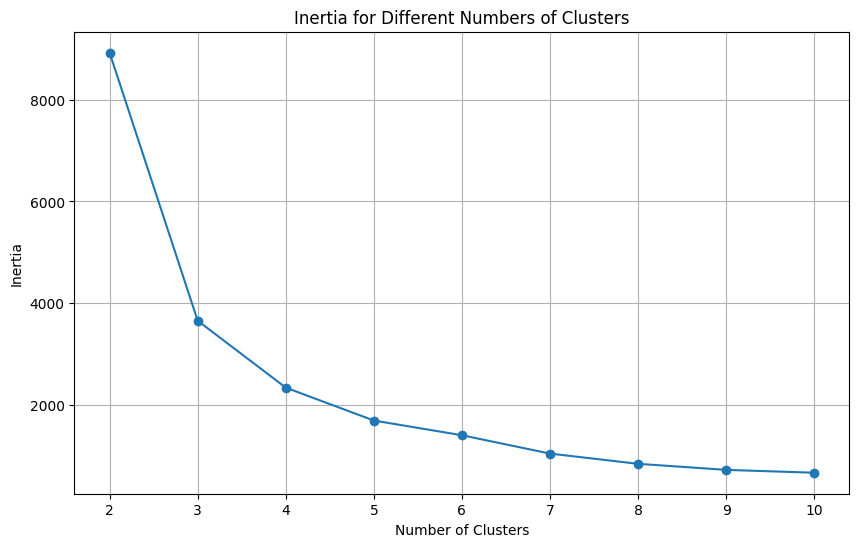

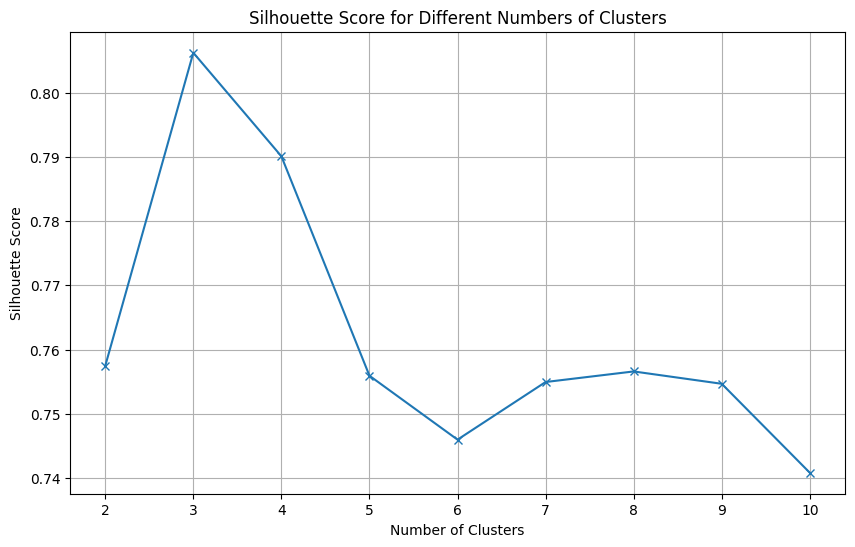

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure no NA values in matched_metrics
matched_metrics = matched_metrics.dropna()

# Normalize the variables
scaler = StandardScaler()
matched_metrics_scaled = scaler.fit_transform(matched_metrics)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(matched_metrics_scaled)

# Find the optimal number of clusters
inertia_values = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_components, kmeans.labels_))

# Plot inertia 
plt.figure(figsize=(10, 6))
plt.plot(K, inertia_values, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores 
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='x')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/60677984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_metrics['Cluster'] = labels


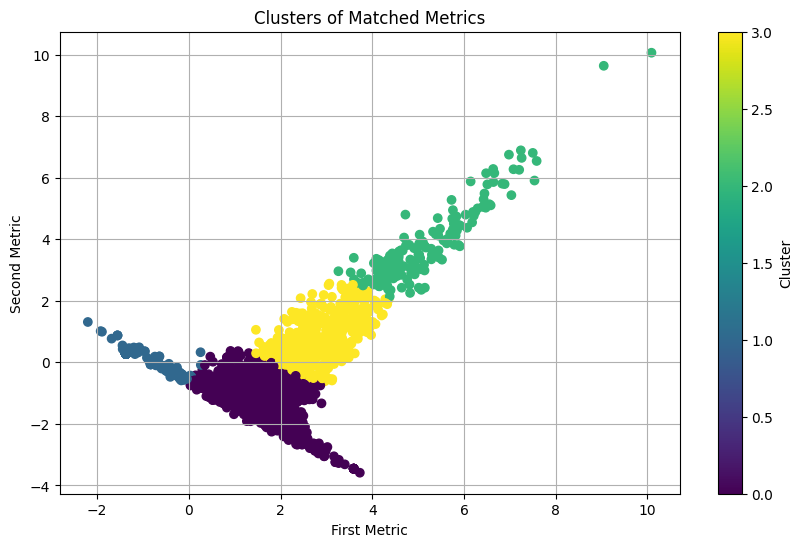

In [65]:
# Perform KMeans clustering 
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(principal_components)
labels = kmeans.labels_

# Add the cluster labels to the matched_metrics 
matched_metrics['Cluster'] = labels

# Define cluster labels
#cluster_labels = {3: 'Blockbuster Ensemble', 2: 'Critically Acclaimed', 0: 'Steady Performers', 1: 'Low Impact Ensemble'}
#matched_metrics['Cluster Label'] = matched_metrics['Cluster'].map(cluster_labels)

# Plot clusters with labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=matched_metrics['Cluster'], cmap='viridis')
plt.title('Clusters of Matched Metrics')
plt.xlabel('First Metric')
plt.ylabel('Second Metric')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
# Add legend with cluster labels
handles, _ = scatter.legend_elements()
#legend_labels = [cluster_labels[i] for i in range(len(handles))]
#plt.legend(handles, legend_labels, title="Cluster Labels")
plt.show()

In [66]:
# For each cluster, get description of principal components
numeric_columns = matched_metrics.select_dtypes(include='number').columns
cluster_descriptions = matched_metrics.groupby('Cluster')[numeric_columns].mean()
cluster_descriptions

,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,Cluster
Cluster,,,,,,
0,5.346608,0.308916,63.807209,58.054873,20.650643,0.0
1,-0.012802,-0.005432,1.258758,0.841129,0.128576,1.0
2,75.469721,0.280851,63.048004,59.423682,272.072848,2.0
3,30.714701,0.274509,62.707410,57.933229,116.120833,3.0


In [68]:
matched_metrics['Cluster'].value_counts()

Cluster
1    3251
0    1477
3     480
2     151
Name: count, dtype: int64

In [69]:
# Define cluster labels
cluster_labels = {0: 'Emerging Ensemble', 1: 'Unknown Cast', 2: 'Star Studded Cast', 3: 'Steady Performers'}
matched_metrics['Cluster Label'] = matched_metrics['Cluster'].map(cluster_labels)

# Display the first few rows to verify the new column
matched_metrics.head()


/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/956725389.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_metrics['Cluster Label'] = matched_metrics['Cluster'].map(cluster_labels)


,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,Cluster,Cluster Label
movie_id,,,,,,,
$9.99 _2008,3.2698,0.163490,66.900,64.526316,20,0,Emerging Ensemble
'til there was you_1997,0.0000,0.000000,0.000,0.000000,0,1,Unknown Cast
...all the marbles_1981,0.0000,0.000000,0.000,0.000000,0,1,Unknown Cast
...and justice for all_1979,0.0000,0.000000,0.000,0.000000,0,1,Unknown Cast
10 cloverfield lane_2016,14.4153,0.360382,57.375,64.825000,40,0,Emerging Ensemble


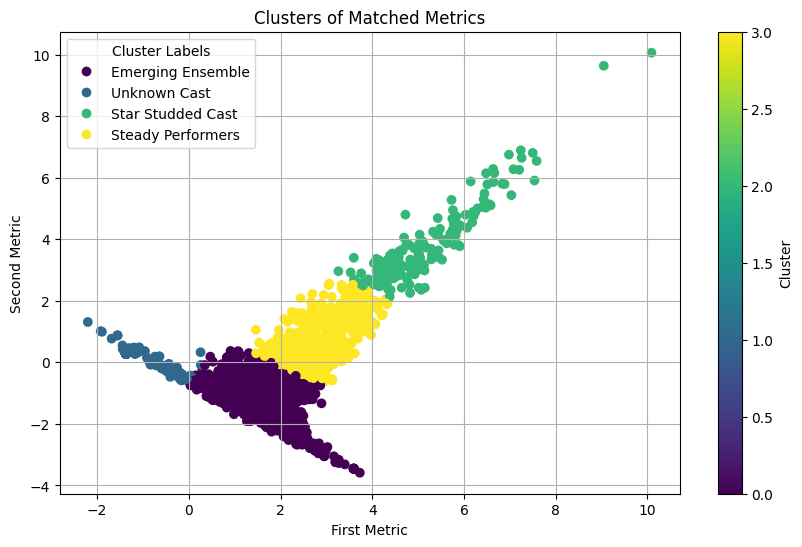

In [70]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=matched_metrics['Cluster'], cmap='viridis')
plt.title('Clusters of Matched Metrics')
plt.xlabel('First Metric')
plt.ylabel('Second Metric')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
# Add legend with cluster labels
handles, _ = scatter.legend_elements()
legend_labels = [cluster_labels[i] for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Cluster Labels")
plt.show()

In [77]:
# Pull the Cluster Label and merge back to aggregated_data
aggregated_data = aggregated_data.merge(matched_metrics[['Cluster Label']], left_on='movie_id', right_index=True, how='left')
aggregated_data.head()

,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,cast,plot,genre,language,Team,Name,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cluster Label
0,$9.99 _2008,3.2698,0.163490,66.900,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,geoffrey rush,the film mainly focuses on 28-year-old dave pe...,"fantasy, animation, drama",english,"[tatia rosenthal, etgar keret]",geoffrey rush,2017-08-23,49.0,73.0,Emerging Ensemble
1,'til there was you_1997,0.0000,0.000000,0.000,0.000000,0,'til there was you,NaN,NaN,3500000.0,...,jeanne tripplehorn,gwen moss (jeanne tripplehorn) has spent the b...,"romance, rom com",english,"[scott winant, winnie holzman]",jeanne tripplehorn,2018-02-02,23.0,57.0,Unknown Cast
2,...all the marbles_1981,0.0000,0.000000,0.000,0.000000,0,...all the marbles,NaN,NaN,6500000.0,...,peter falk,harry is the manager of a tag team of gorgeous...,"drama, comedy",english,"[robert aldrich, rich eustismel frohman]",peter falk,2005-09-13,51.0,45.0,Unknown Cast
3,...and justice for all_1979,0.0000,0.000000,0.000,0.000000,0,...and justice for all,NaN,NaN,33300000.0,...,al pacino,"arthur kirkland, a defense attorney in baltimo...","drama, comedy",english,"[norman jewison, valerie curtin]",al pacino,2017-09-02,82.0,91.0,Unknown Cast
4,10 cloverfield lane_2016,14.4153,0.360382,57.375,64.825000,40,10 cloverfield lane,pg-13,"frightening sequences, brief language, some vi...",110200000.0,...,mary elizabeth winstead,"after breaking up with her boyfriend ben, mich...","mystery & thriller, science fiction psychologi...",english,"[dan trachtenberg, josh campbell, matthew stue...",mary elizabeth winstead,2018-10-10,71.0,86.0,Emerging Ensemble


In [78]:
# Change the name of the column 'Cluster Label' to 'Cast_Cluster_Label'
aggregated_data.rename(columns={'Cluster Label': 'Cast_Cluster_Label'}, inplace=True)
aggregated_data.head()


,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,cast,plot,genre,language,Team,Name,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Cluster_Label
0,$9.99 _2008,3.2698,0.163490,66.900,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,geoffrey rush,the film mainly focuses on 28-year-old dave pe...,"fantasy, animation, drama",english,"[tatia rosenthal, etgar keret]",geoffrey rush,2017-08-23,49.0,73.0,Emerging Ensemble
1,'til there was you_1997,0.0000,0.000000,0.000,0.000000,0,'til there was you,NaN,NaN,3500000.0,...,jeanne tripplehorn,gwen moss (jeanne tripplehorn) has spent the b...,"romance, rom com",english,"[scott winant, winnie holzman]",jeanne tripplehorn,2018-02-02,23.0,57.0,Unknown Cast
2,...all the marbles_1981,0.0000,0.000000,0.000,0.000000,0,...all the marbles,NaN,NaN,6500000.0,...,peter falk,harry is the manager of a tag team of gorgeous...,"drama, comedy",english,"[robert aldrich, rich eustismel frohman]",peter falk,2005-09-13,51.0,45.0,Unknown Cast
3,...and justice for all_1979,0.0000,0.000000,0.000,0.000000,0,...and justice for all,NaN,NaN,33300000.0,...,al pacino,"arthur kirkland, a defense attorney in baltimo...","drama, comedy",english,"[norman jewison, valerie curtin]",al pacino,2017-09-02,82.0,91.0,Unknown Cast
4,10 cloverfield lane_2016,14.4153,0.360382,57.375,64.825000,40,10 cloverfield lane,pg-13,"frightening sequences, brief language, some vi...",110200000.0,...,mary elizabeth winstead,"after breaking up with her boyfriend ben, mich...","mystery & thriller, science fiction psychologi...",english,"[dan trachtenberg, josh campbell, matthew stue...",mary elizabeth winstead,2018-10-10,71.0,86.0,Emerging Ensemble


In [96]:
team = pd.read_csv('team_reviews.csv')
team1 = team.drop_duplicates()

In [97]:
team1.head()

,Name,Review,reviewId,creationDate,audienceScore,tomatoMeter
0,baltasar kormákur,Director Baltasar Kormákur . . . exacerbates m...,2707675,2020-07-24,65.0,69.0
1,baltasar kormákur,The production could have fallen into the trap...,2640278,2019-10-29,65.0,69.0
2,robert wise,...a fairly typical film-noir premise that's e...,2340106,2016-07-15,74.0,83.0
3,robert wise,The usually meek Robert Wise trades his chamel...,1501617,2006-05-01,74.0,83.0
4,william friedkin,If you love The Exorcist or if you have a love...,102730980,2022-09-14,86.0,93.0


In [98]:
team1['Sentiment'] = team1['Review'].apply(lambda review: analyzer.polarity_scores(review))
team1['compound'] = team1['Sentiment'].apply(lambda sentiment: sentiment['compound'])

/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/351509310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1['Sentiment'] = team1['Review'].apply(lambda review: analyzer.polarity_scores(review))
/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/351509310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team1['compound'] = team1['Sentiment'].apply(lambda sentiment: sentiment['compound'])


In [99]:
exploded_aggregated_data = aggregated_data.explode('Team')

In [100]:
exploded_aggregated_data.drop(columns=['Name'], inplace=True)

In [101]:
total = exploded_aggregated_data.merge(team1,left_on='Team', right_on='Name', how='left')

In [102]:
total.head()

,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,Cast_tomatoMeter,Cast_Cluster_Label,Name,Review,reviewId,creationDate,audienceScore,tomatoMeter,Sentiment,compound
0,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,Director Tatia Rosenthal's inspiration was to ...,1861005.0,2009-12-16,55.0,73.0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.7430
1,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,"$9.99 doesn't make any big statements, but Ker...",1835277.0,2009-07-31,55.0,73.0,"{'neg': 0.068, 'neu': 0.854, 'pos': 0.078, 'co...",0.1154
2,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,Using the medium of Wallace and Gromit and Gum...,1834952.0,2009-07-30,55.0,73.0,"{'neg': 0.083, 'neu': 0.75, 'pos': 0.167, 'com...",0.4588
3,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,There is something undeniable hypnotic and bew...,1787649.0,2008-12-22,55.0,73.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,The stop-motion animated puppets in Tatia Rose...,1785608.0,2008-12-11,55.0,73.0,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.3612


In [103]:
total.shape

(562152, 34)

In [104]:
total.rename(columns={
    'audienceScore': 'Team_audienceScore',
    'tomatoMeter': 'Team_tomatoMeter',
    'Sentiment': 'Team_Sentiment',
    'compound': 'Team_compound',
    'Review': 'Team_Review',
    'reviewId': 'Team_reviewId',
    'creationDate': 'Team_creationDate'
}, inplace=True)
total.head()

,movie_id,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,Cast_Num_reviews,title,rating,rating_contents,box_office,...,Cast_tomatoMeter,Cast_Cluster_Label,Name,Team_Review,Team_reviewId,Team_creationDate,Team_audienceScore,Team_tomatoMeter,Team_Sentiment,Team_compound
0,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,Director Tatia Rosenthal's inspiration was to ...,1861005.0,2009-12-16,55.0,73.0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.7430
1,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,"$9.99 doesn't make any big statements, but Ker...",1835277.0,2009-07-31,55.0,73.0,"{'neg': 0.068, 'neu': 0.854, 'pos': 0.078, 'co...",0.1154
2,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,Using the medium of Wallace and Gromit and Gum...,1834952.0,2009-07-30,55.0,73.0,"{'neg': 0.083, 'neu': 0.75, 'pos': 0.167, 'com...",0.4588
3,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,There is something undeniable hypnotic and bew...,1787649.0,2008-12-22,55.0,73.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,$9.99 _2008,3.2698,0.16349,66.9,64.526316,20,$9.99,r,"nudity, language, brief sexuality",52100.0,...,73.0,Emerging Ensemble,tatia rosenthal,The stop-motion animated puppets in Tatia Rose...,1785608.0,2008-12-11,55.0,73.0,"{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...",0.3612


In [105]:
aggregated_data_team_cast = total.groupby('movie_id').apply(lambda group: pd.Series({
    'Team_Review_Score_sum': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_compound'].sum() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    'Team_Review_Score_mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_compound'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    'Team_Audience_Score_Mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_audienceScore'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    'Team_Tomato_Meter_Mean': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_tomatoMeter'].mean() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    'Team_Num_reviews': group.loc[group['Team_creationDate'] < group['release_year'], 'Team_reviewId'].nunique() if not group[group['Team_creationDate'] < group['release_year']].empty else 0,
    #'Cast_Review_Score_sum': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_compound'].sum() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    #'Cast_Review_Score_mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_compound'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    #'Cast_Audience_Score_Mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_audienceScore'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    #'Cast_Tomato_Meter_Mean': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_tomatoMeter'].mean() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    #'Cast_Num_reviews': group.loc[group['Cast_creationDate'] < group['release_year'], 'Cast_reviewId'].nunique() if not group[group['Cast_creationDate'] < group['release_year']].empty else 0,
    **{col: group[col].iloc[0] for col in total.columns if col not in ['movie_id', 'Team_compound', 'Team_Review', 'Team_reviewId']}
})).reset_index()

aggregated_data_team_cast.head()

/var/folders/6_/6d4wvl895t3_bmq4xhpd5djc0000gp/T/ipykernel_3001/1875458900.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data_team_cast = total.groupby('movie_id').apply(lambda group: pd.Series({


,movie_id,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,...,Team,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Cluster_Label,Name,Team_creationDate,Team_audienceScore,Team_tomatoMeter,Team_Sentiment
0,$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1,3.2698,0.163490,66.900,64.526316,...,tatia rosenthal,2017-08-23,49.0,73.0,Emerging Ensemble,tatia rosenthal,2009-12-16,55.0,73.0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."
1,'til there was you_1997,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,scott winant,2018-02-02,23.0,57.0,Unknown Cast,scott winant,2014-05-05,35.0,5.0,"{'neg': 0.098, 'neu': 0.748, 'pos': 0.154, 'co..."
2,...all the marbles_1981,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,robert aldrich,2005-09-13,51.0,45.0,Unknown Cast,robert aldrich,2020-11-20,90.0,81.0,"{'neg': 0.13, 'neu': 0.732, 'pos': 0.137, 'com..."
3,...and justice for all_1979,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,norman jewison,2017-09-02,82.0,91.0,Unknown Cast,norman jewison,2019-01-23,69.0,53.0,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp..."
4,10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20,14.4153,0.360382,57.375,64.825000,...,dan trachtenberg,2018-10-10,71.0,86.0,Emerging Ensemble,dan trachtenberg,2016-08-31,79.0,88.0,"{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp..."


In [106]:
matched_metrics_team_cast = aggregated_data_team_cast[['movie_id', 'Team_Review_Score_sum', 'Team_Review_Score_mean', 'Team_Audience_Score_Mean', 'Team_Tomato_Meter_Mean', 'Team_Num_reviews']]
matched_metrics_team_cast.set_index('movie_id', inplace=True)

In [107]:
matched_metrics_team_cast.head()

,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews
movie_id,,,,,
$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1
'til there was you_1997,0.0000,0.000000,0.00,0.00,0
...all the marbles_1981,0.0000,0.000000,0.00,0.00,0
...and justice for all_1979,0.0000,0.000000,0.00,0.00,0
10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20


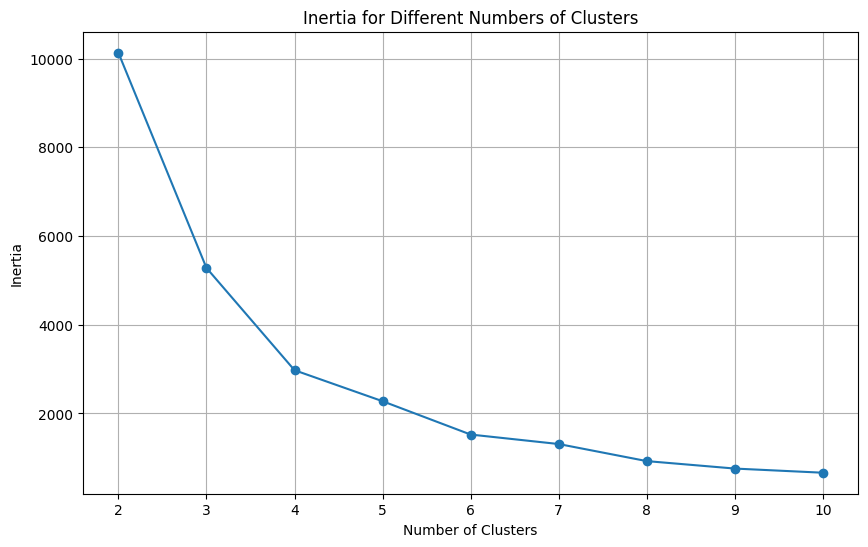

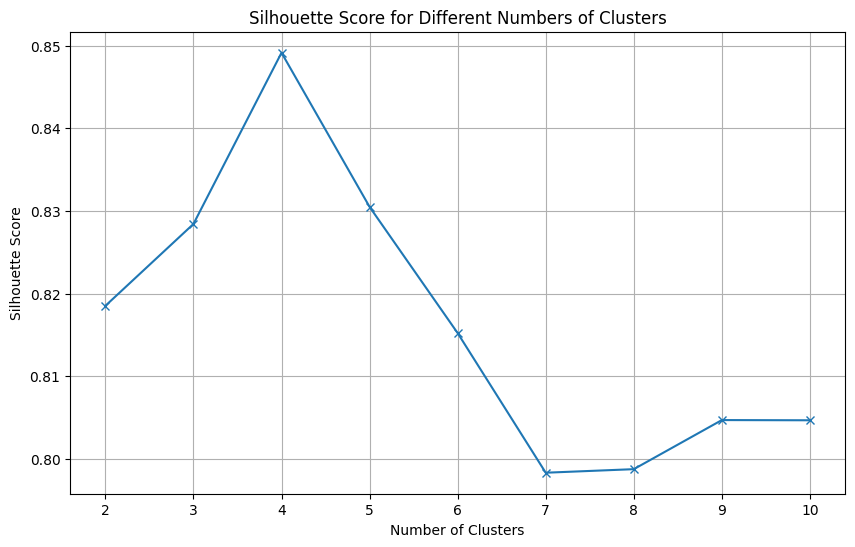

In [108]:
matched_metrics_team_cast= matched_metrics_team_cast.dropna()

# Normalize the variables
scaler = StandardScaler()
matched_metrics_team_cast_scaled = scaler.fit_transform(matched_metrics_team_cast)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(matched_metrics_team_cast_scaled)

# Find the optimal number of clusters
inertia_values = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_components, kmeans.labels_))

# Plot inertia 
plt.figure(figsize=(10, 6))
plt.plot(K, inertia_values, marker='o')
plt.title('Inertia for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Plot silhouette scores 
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='x')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

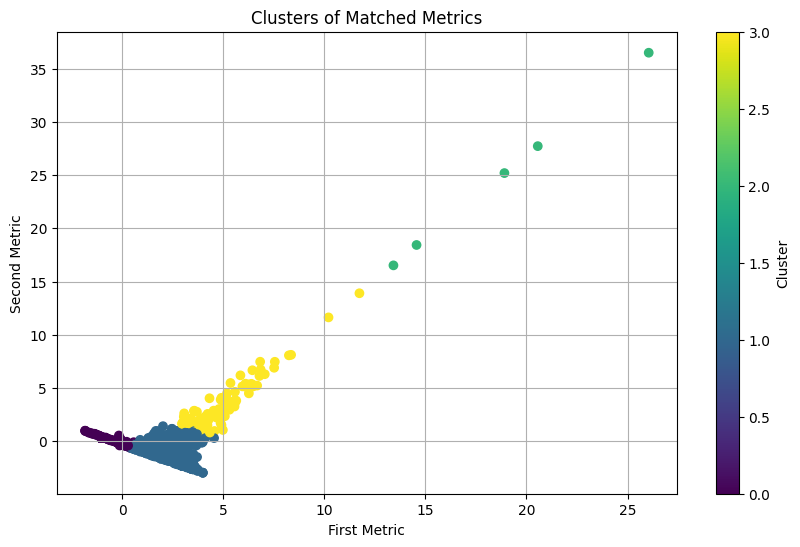

In [109]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(principal_components)
labels = kmeans.labels_

# Add the cluster labels to the matched_metrics 
matched_metrics_team_cast['Cluster'] = labels

# Define cluster labels
#cluster_labels = {3: 'Blockbuster Ensemble', 2: 'Critically Acclaimed', 0: 'Steady Performers', 1: 'Low Impact Ensemble'}
#matched_metrics['Cluster Label'] = matched_metrics['Cluster'].map(cluster_labels)

# Plot clusters with labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=matched_metrics_team_cast['Cluster'], cmap='viridis')
plt.title('Clusters of Matched Metrics')
plt.xlabel('First Metric')
plt.ylabel('Second Metric')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
# Add legend with cluster labels
handles, _ = scatter.legend_elements()
#legend_labels = [cluster_labels[i] for i in range(len(handles))]
#plt.legend(handles, legend_labels, title="Cluster Labels")
plt.show()

In [110]:
numeric_columns = matched_metrics_team_cast.select_dtypes(include='number').columns
cluster_descriptions = matched_metrics_team_cast.groupby('Cluster')[numeric_columns].mean()
cluster_descriptions

,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cluster
Cluster,,,,,,
0,-0.042850,-0.010644,1.937142,1.333599,0.200374,0.0
1,4.870996,0.264456,66.078020,62.152982,18.318725,1.0
2,478.404320,0.343712,62.045092,65.690200,690.200000,2.0
3,55.192088,0.243280,66.729689,65.138712,189.695238,3.0


In [111]:
matched_metrics_team_cast['Cluster'].value_counts()

Cluster
0    3743
1    1506
3     105
2       5
Name: count, dtype: int64

In [112]:
# Define cluster labels
cluster_labels = {0: 'Unknown Director / Writer', 1: 'Emerging Director / Writer', 2: 'Blockbuster Team', 3: 'Established Team'}
matched_metrics_team_cast['Cluster Label'] = matched_metrics_team_cast['Cluster'].map(cluster_labels)

# Display the first few rows to verify the cluster labels
matched_metrics_team_cast.head()


,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cluster,Cluster Label
movie_id,,,,,,,
$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1,0,Unknown Director / Writer
'til there was you_1997,0.0000,0.000000,0.00,0.00,0,0,Unknown Director / Writer
...all the marbles_1981,0.0000,0.000000,0.00,0.00,0,0,Unknown Director / Writer
...and justice for all_1979,0.0000,0.000000,0.00,0.00,0,0,Unknown Director / Writer
10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20,1,Emerging Director / Writer


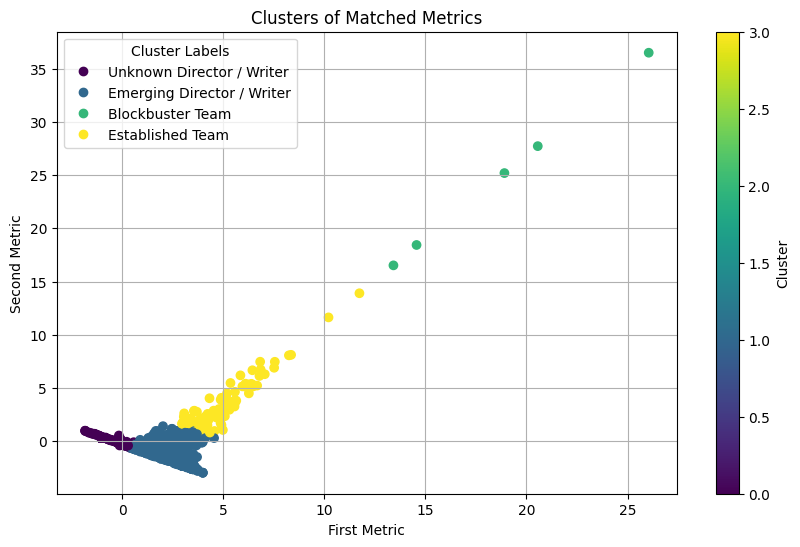

In [114]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=matched_metrics_team_cast['Cluster'], cmap='viridis')
plt.title('Clusters of Matched Metrics')
plt.xlabel('First Metric')
plt.ylabel('Second Metric')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
# Add legend with cluster labels
handles, _ = scatter.legend_elements()
legend_labels = [cluster_labels[i] for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Cluster Labels")
plt.show()

In [115]:
aggregated_data_team_cast = aggregated_data_team_cast.merge(matched_metrics_team_cast[['Cluster Label']], left_on='movie_id', right_index=True, how='left')
aggregated_data_team_cast.head()

,movie_id,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,...,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Cluster_Label,Name,Team_creationDate,Team_audienceScore,Team_tomatoMeter,Team_Sentiment,Cluster Label
0,$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1,3.2698,0.163490,66.900,64.526316,...,2017-08-23,49.0,73.0,Emerging Ensemble,tatia rosenthal,2009-12-16,55.0,73.0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",Unknown Director / Writer
1,'til there was you_1997,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,2018-02-02,23.0,57.0,Unknown Cast,scott winant,2014-05-05,35.0,5.0,"{'neg': 0.098, 'neu': 0.748, 'pos': 0.154, 'co...",Unknown Director / Writer
2,...all the marbles_1981,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,2005-09-13,51.0,45.0,Unknown Cast,robert aldrich,2020-11-20,90.0,81.0,"{'neg': 0.13, 'neu': 0.732, 'pos': 0.137, 'com...",Unknown Director / Writer
3,...and justice for all_1979,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,2017-09-02,82.0,91.0,Unknown Cast,norman jewison,2019-01-23,69.0,53.0,"{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'comp...",Unknown Director / Writer
4,10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20,14.4153,0.360382,57.375,64.825000,...,2018-10-10,71.0,86.0,Emerging Ensemble,dan trachtenberg,2016-08-31,79.0,88.0,"{'neg': 0.201, 'neu': 0.799, 'pos': 0.0, 'comp...",Emerging Director / Writer


In [116]:
# Drop the 'Team_Sentiment' column
aggregated_data_team_cast = aggregated_data_team_cast.drop(columns=['Team_Sentiment'])

# Rename 'Cluster Label' to 'Team_Cluster Label'
aggregated_data_team_cast = aggregated_data_team_cast.rename(columns={'Cluster Label': 'Team_Cluster Label'})

# Display the first few rows to verify the changes
aggregated_data_team_cast.head()


,movie_id,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,...,Team,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Cluster_Label,Name,Team_creationDate,Team_audienceScore,Team_tomatoMeter,Team_Cluster Label
0,$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1,3.2698,0.163490,66.900,64.526316,...,tatia rosenthal,2017-08-23,49.0,73.0,Emerging Ensemble,tatia rosenthal,2009-12-16,55.0,73.0,Unknown Director / Writer
1,'til there was you_1997,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,scott winant,2018-02-02,23.0,57.0,Unknown Cast,scott winant,2014-05-05,35.0,5.0,Unknown Director / Writer
2,...all the marbles_1981,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,robert aldrich,2005-09-13,51.0,45.0,Unknown Cast,robert aldrich,2020-11-20,90.0,81.0,Unknown Director / Writer
3,...and justice for all_1979,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,norman jewison,2017-09-02,82.0,91.0,Unknown Cast,norman jewison,2019-01-23,69.0,53.0,Unknown Director / Writer
4,10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20,14.4153,0.360382,57.375,64.825000,...,dan trachtenberg,2018-10-10,71.0,86.0,Emerging Ensemble,dan trachtenberg,2016-08-31,79.0,88.0,Emerging Director / Writer


In [117]:
aggregated_data_team_cast.shape

(5362, 36)

In [118]:
### FINAL DATASET
aggregated_data_team_cast.head()

,movie_id,Team_Review_Score_sum,Team_Review_Score_mean,Team_Audience_Score_Mean,Team_Tomato_Meter_Mean,Team_Num_reviews,Cast_Review_Score_sum,Cast_Review_Score_mean,Cast_Audience_Score_Mean,Cast_Tomato_Meter_Mean,...,Team,Cast_creationDate,Cast_audienceScore,Cast_tomatoMeter,Cast_Cluster_Label,Name,Team_creationDate,Team_audienceScore,Team_tomatoMeter,Team_Cluster Label
0,$9.99 _2008,-0.7063,-0.706300,82.00,67.00,1,3.2698,0.163490,66.900,64.526316,...,tatia rosenthal,2017-08-23,49.0,73.0,Emerging Ensemble,tatia rosenthal,2009-12-16,55.0,73.0,Unknown Director / Writer
1,'til there was you_1997,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,scott winant,2018-02-02,23.0,57.0,Unknown Cast,scott winant,2014-05-05,35.0,5.0,Unknown Director / Writer
2,...all the marbles_1981,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,robert aldrich,2005-09-13,51.0,45.0,Unknown Cast,robert aldrich,2020-11-20,90.0,81.0,Unknown Director / Writer
3,...and justice for all_1979,0.0000,0.000000,0.00,0.00,0,0.0000,0.000000,0.000,0.000000,...,norman jewison,2017-09-02,82.0,91.0,Unknown Cast,norman jewison,2019-01-23,69.0,53.0,Unknown Director / Writer
4,10 cloverfield lane_2016,6.5997,0.329985,89.35,93.15,20,14.4153,0.360382,57.375,64.825000,...,dan trachtenberg,2018-10-10,71.0,86.0,Emerging Ensemble,dan trachtenberg,2016-08-31,79.0,88.0,Emerging Director / Writer


In [119]:
aggregated_data_team_cast.columns

Index(['movie_id', 'Team_Review_Score_sum', 'Team_Review_Score_mean',
       'Team_Audience_Score_Mean', 'Team_Tomato_Meter_Mean',
       'Team_Num_reviews', 'Cast_Review_Score_sum', 'Cast_Review_Score_mean',
       'Cast_Audience_Score_Mean', 'Cast_Tomato_Meter_Mean',
       'Cast_Num_reviews', 'title', 'rating', 'rating_contents', 'box_office',
       'distributor', 'sound_mix', 'belongs_to_collection', 'budget', 'id',
       'runtime', 'release_year', 'cast', 'plot', 'genre', 'language', 'Team',
       'Cast_creationDate', 'Cast_audienceScore', 'Cast_tomatoMeter',
       'Cast_Cluster_Label', 'Name', 'Team_creationDate', 'Team_audienceScore',
       'Team_tomatoMeter', 'Team_Cluster Label'],
      dtype='object')

In [120]:
aggregated_data_team_cast.to_csv('final_dataset_cam.csv', index=False)